In [1]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

2022-10-16 09:14:25.324344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-16 09:14:25.508333: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-16 09:14:26.424969: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-16 09:14:26.425066: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [2]:
# data_feed = yf.download('BTC-USD','2010-5-25','2022-5-25')
# data_feed.to_csv('BTC-USD_big.csv')

In [3]:
# start_date=datetime.datetime(2014, 9, 17)
# end_date=datetime.datetime(2022,5,24)

df=pd.read_csv("BTC-USD.csv")
# df['Date'] = pd.to_datetime(df['Date'])
# df['Date'] = df['Date'].dt.date
# df.index=pd.to_datetime(df["Date"])
# df=df.drop("Date",axis=1)
# df.drop("Adj Close",axis=1,inplace=True)

In [4]:
print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

Total number of days present in the dataset:  4331
Total number of fields present in the dataset:  7


In [5]:
df.shape

(4331, 7)

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4326,2022-05-20,30311.119141,30664.976562,28793.605469,29200.740234,29200.740234,30749382605
4327,2022-05-21,29199.859375,29588.869141,29027.394531,29432.226562,29432.226562,17274840442
4328,2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656,30323.722656,21631532270
4329,2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,29098.910156,31483454557
4330,2022-05-24,29101.125000,29774.355469,28786.589844,29655.585938,29655.585938,26616506245


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4331 entries, 0 to 4330
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4331 non-null   object 
 1   Open       4331 non-null   float64
 2   High       4331 non-null   float64
 3   Low        4331 non-null   float64
 4   Close      4331 non-null   float64
 5   Adj Close  4331 non-null   float64
 6   Volume     4331 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 237.0+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4331.000000,4331.000000,4331.000000,4331.000000,4331.000000,4.331000e+03
mean,7983.787999,8197.570153,7745.351457,7989.650964,7989.650964,9.019809e+09
std,14578.806939,14956.980803,14145.182392,14578.946612,14578.946612,1.784549e+10
min,0.049510,0.049510,0.010000,0.049510,0.049510,0.000000e+00
25%,115.810001,122.250000,108.790001,116.180000,116.180000,1.774261e+06
50%,651.000000,663.429993,632.229980,651.049988,651.049988,2.884554e+07
75%,8400.688476,8635.823242,8183.049805,8413.083008,8413.083008,1.458125e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [10]:
print('Null Values:',df.isnull().values.sum())

Null Values: 0


In [11]:
# Printing the start date and End date of the dataset

sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2010-07-16
Ending Date 2022-05-24


In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2010 = df.loc[(df['Date'] >= '2010-07-16')
                     & (df['Date'] < '2010-12-31')]

y_2010.drop(y_2010[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2010-07-16,0.04951,0.04951,0.04951,0.04951
1,2010-07-17,0.04951,0.08585,0.05941,0.08584
2,2010-07-18,0.08584,0.09307,0.07723,0.08080
3,2010-07-19,0.08080,0.08181,0.07426,0.07474
4,2010-07-20,0.07474,0.07921,0.06634,0.07921
...,...,...,...,...,...
162,2010-12-26,0.24990,0.27000,0.24640,0.26500
163,2010-12-27,0.26500,0.27000,0.25100,0.26500
164,2010-12-28,0.26500,0.28100,0.26120,0.28100
165,2010-12-29,0.28100,0.30100,0.27100,0.30000


In [13]:
monthvise= y_2010.groupby(y_2010['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,0.063320,0.064044
August,0.064547,0.064605
September,0.061879,0.061848


In [14]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [15]:
y_2010.groupby(y_2010['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2010.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2010.groupby(y_2010['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [16]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2010, x=y_2010.Date, y=[y_2010['Open'], y_2010['Close'], 
                                          y_2010['High'], y_2010['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_overall = df.loc[(df['Date'] >= '2010-07-16')
                     & (df['Date'] <= '2022-05-24')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2010-07-16,0.049510,0.049510,0.049510,0.049510
1,2010-07-17,0.049510,0.085850,0.059410,0.085840
2,2010-07-18,0.085840,0.093070,0.077230,0.080800
3,2010-07-19,0.080800,0.081810,0.074260,0.074740
4,2010-07-20,0.074740,0.079210,0.066340,0.079210
...,...,...,...,...,...
4326,2022-05-20,30311.119141,30664.976562,28793.605469,29200.740234
4327,2022-05-21,29199.859375,29588.869141,29027.394531,29432.226562
4328,2022-05-22,29432.472656,30425.861328,29275.183594,30323.722656
4329,2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156


In [18]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,8637.227560,8620.373795
February,9235.265004,9284.369569
March,9708.580834,9737.077668
April,10149.883429,10141.179371
May,8526.602057,8458.742585
June,5981.482842,5977.425796
July,5710.895116,5737.630913
August,6656.883586,6677.147327
September,6560.176187,6542.270584


In [19]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [20]:
# Lets First Take all the Close Price 
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (4331, 2)


In [21]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [22]:
closedf = closedf[closedf['Date'] > '2021-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  459


In [23]:
closedf


,Date,Close
3872,2021-02-20,56099.519531
3873,2021-02-21,57539.945312
3874,2021-02-22,54207.320312
3875,2021-02-23,48824.425781
3876,2021-02-24,49705.332031
...,...,...
4326,2022-05-20,29200.740234
4327,2022-05-21,29432.226562
4328,2022-05-22,30323.722656
4329,2022-05-23,29098.910156


In [24]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [25]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(459, 1)


In [26]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (275, 1)
test_data:  (184, 1)


In [27]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [28]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (259, 15)
y_train:  (259,)
X_test:  (168, 15)
y_test (168,)


In [29]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (259, 15, 1)
X_test:  (168, 15, 1)


In [30]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

2022-10-16 09:23:00.751271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 09:23:00.828278: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-10-16 09:23:00.828303: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-10-16 09:23:00.828786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [31]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
9/9 [==============================] - 2s 40ms/step - loss: 0.2881 - val_loss: 0.0911
Epoch 2/200
9/9 [==============================] - 0s 10ms/step - loss: 0.2347 - val_loss: 0.0702
Epoch 3/200
9/9 [==============================] - 0s 10ms/step - loss: 0.1862 - val_loss: 0.0511
Epoch 4/200
9/9 [==============================] - 0s 10ms/step - loss: 0.1402 - val_loss: 0.0337
Epoch 5/200
9/9 [==============================] - 0s 11ms/step - loss: 0.0939 - val_loss: 0.0184
Epoch 6/200
9/9 [==============================] - 0s 11ms/step - loss: 0.0511 - val_loss: 0.0081
Epoch 7/200
9/9 [==============================] - 0s 12ms/step - loss: 0.0195 - val_loss: 0.0072
Epoch 8/200
9/9 [==============================] - 0s 12ms/step - loss: 0.0127 - val_loss: 0.0100
Epoch 9/200
9/9 [==============================] - 0s 13ms/step - loss: 0.0107 - val_loss: 0.0054
Epoch 10/200
9/9 [==============================] - 0s 12ms/step - loss: 0.0097 - val_loss: 0.0051
Epoch 11/200
9/9 [=

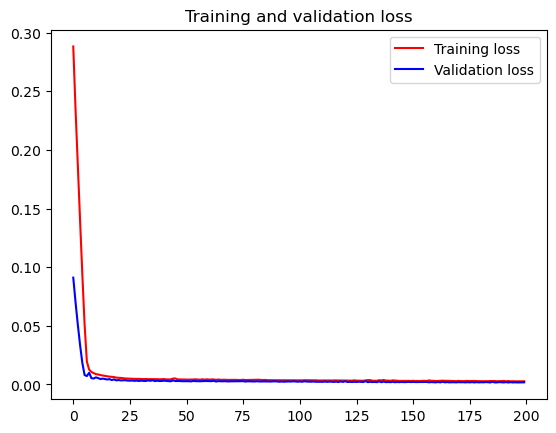

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 3ms/step


((259, 1), (168, 1))

In [34]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [35]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  2007.7207720481686
Train data MSE:  4030942.6985136936
Train data MAE:  1578.594519184363
-------------------------------------------------------------------------------------
Test data RMSE:  1664.033493373703
Test data MSE:  2769007.4670694903
Test data MAE:  1277.273460751488


In [36]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9616324553090025
Test data explained variance regression score: 0.9069112480320204


In [37]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9613359855188209
Test data R2 score: 0.8965919230709984


In [38]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0018627092613416783
Test data MGD:  0.0017045678566454854
----------------------------------------------------------------------
Train data MPD:  84.89348631464466
Test data MPD:  68.14829563283006


In [39]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (459, 1)
Test predicted data:  (459, 1)


In [40]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [41]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [42]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



In [43]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()